[&larr; Back to Index](index.html)

In [1]:
import librosa
import IPython.display
import sklearn.preprocessing
import essentia
import essentia.standard as ess
import numpy
import matplotlib.pyplot as plt

# Mel Frequency Cepstral Coefficients (MFCCs)

The [mel frequency cepstral coefficients](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum) (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. In MIR, it is often used to describe timbre.

Download an audio file:

Plot the audio signal:

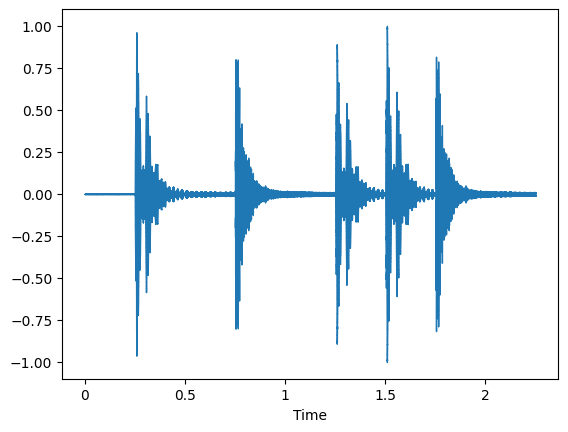

In [2]:
x, fs = librosa.load('audio/simple_loop.wav')
librosa.display.waveshow(x, sr=fs);

Play the audio:

In [3]:
IPython.display.Audio(x, rate=fs)

## `librosa.feature.mfcc`

[`librosa.feature.mfcc`](https://librosa.github.io/librosa/generated/librosa.feature.mfcc.html#librosa.feature.mfcc) computes MFCCs across an audio signal:


In [4]:
mfccs = librosa.feature.mfcc(y=x, sr=fs)
print(mfccs.shape)

(20, 97)


In this case, `mfcc` computed 20 MFCCs over 130 frames.

The very first MFCC, the 0th coefficient, does not convey information relevant to the overall shape of the spectrum. It only conveys a constant offset, i.e. adding a constant value to the entire spectrum. Therefore, many practitioners will discard the first MFCC when performing classification. For now, we will use the MFCCs as is.

Display the MFCCs:

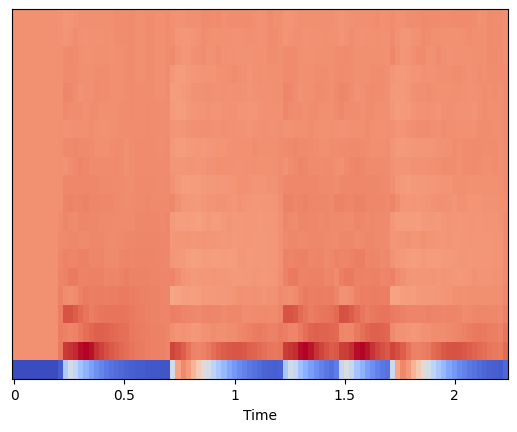

In [5]:
librosa.display.specshow(mfccs, sr=fs, x_axis='time');

### Feature Scaling

Let's scale the MFCCs such that each coefficient dimension has zero mean and unit variance:

In [6]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[-4.3013659e-09  5.2230873e-09  7.3737705e-09 -1.1367896e-08
 -4.6086064e-09  1.2750478e-08  6.4520491e-09  1.3518579e-08
  2.7651639e-09 -1.8127185e-08  8.6027319e-09 -5.5303278e-09
 -6.1448086e-10  4.9158468e-09 -9.2172128e-09 -2.1506830e-09
  3.6868852e-09  4.9158468e-09 -1.5362022e-09  7.3737705e-09]
[0.99999994 1.0000001  0.99999994 0.99999994 0.99999994 1.
 1.0000001  0.9999998  1.         0.99999994 1.         1.
 1.         1.         1.0000002  0.99999994 1.0000001  0.99999994
 0.99999994 1.0000001 ]


/Users/gijs/Github/iranroman/musicinformationretrieval.com/venv/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/gijs/Github/iranroman/musicinformationretrieval.com/venv/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Display the scaled MFCCs:

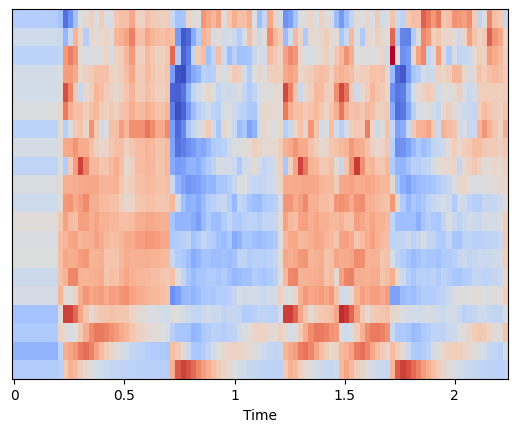

In [7]:
librosa.display.specshow(mfccs, sr=fs, x_axis='time');

## `essentia.standard.MFCC`

We can also use [`essentia.standard.MFCC`](http://essentia.upf.edu/documentation/reference/std_MFCC.html) to compute MFCCs across a signal, and we will display them as a "MFCC-gram":

In [8]:
hamming_window = ess.Windowing(type='hamming')
spectrum = ess.Spectrum()  # we just want the magnitude spectrum
mfcc = ess.MFCC(numberCoefficients=13)
frame_sz = 1024
hop_sz = 500

mfccs = numpy.array([mfcc(spectrum(hamming_window(frame)))[1]
               for frame in ess.FrameGenerator(x, frameSize=frame_sz, hopSize=hop_sz)])
print(mfccs.shape)

(101, 13)


[   INFO   ] TriangularBands: input spectrum size (513) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.


Scale the MFCCs:

In [9]:
mfccs = sklearn.preprocessing.scale(mfccs)

/Users/gijs/Github/iranroman/musicinformationretrieval.com/venv/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/gijs/Github/iranroman/musicinformationretrieval.com/venv/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Plot the MFCCs:

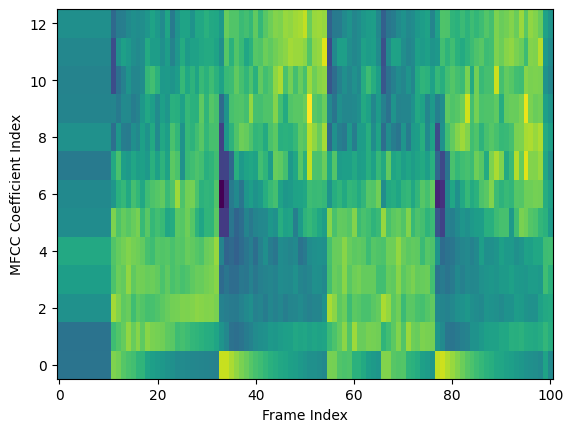

In [11]:
plt.imshow(mfccs.T, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Frame Index');

[&larr; Back to Index](index.html)